In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
plt.style.use("seaborn-v0_8-dark-palette")
print(tf.__version__)

2.15.0


# Exercise 1

$$x = (0, 2\pi)$$
$$y_{sin} = sin(x)$$
$$y_{cos} = cos(x)$$

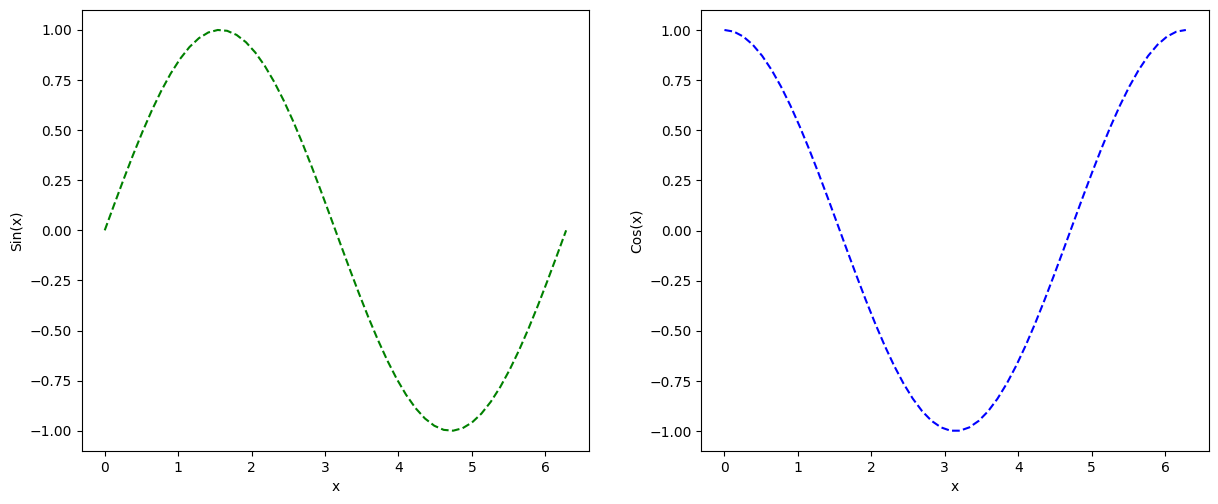

In [ ]:
x = np.linspace(0, 2*np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.tight_layout(w_pad=5)

# Draw Sin(x)
axs[0].plot(x, y_sin, 'g--')
axs[0].set_xlabel("x")
axs[0].set_ylabel("Sin(x)")

# Draw Cos(x)
axs[1].plot(x, y_cos, 'b--')
axs[1].set_xlabel("x")
axs[1].set_ylabel("Cos(x)")

plt.show()

# Exercise 2

`np.unique` count the number of recurrent of the numbers but implementing the `unique` function for better undrestanding.

In [ ]:
np.random.seed(99121034)
r_nums = np.random.randint(0, 20+1, size=1000).astype(np.float32)

In [ ]:
from collections import defaultdict
def unique(array):
    mapper = defaultdict(int)
    for i in array:
        mapper[i] += 1
    return mapper.items()

print("Number\tCount")
print("-"*15)
for num, count in unique(r_nums):
    print(f"{num}\t{count}")

Number	Count
---------------
12.0	40
15.0	44
0.0	47
3.0	63
7.0	48
9.0	46
19.0	58
18.0	50
4.0	52
6.0	50
1.0	49
14.0	42
17.0	43
5.0	55
13.0	46
8.0	44
20.0	44
16.0	48
10.0	41
11.0	48
2.0	42


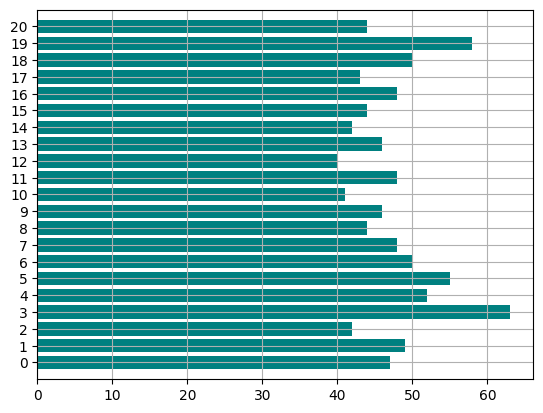

In [ ]:
labels, counts = np.unique(r_nums, return_counts=True)
plt.barh(labels, counts, align='center', color='teal')
plt.gca().set_yticks(labels)
plt.gca().set_ylim((-1, 21))
plt.grid(True)
plt.show()

# Exercise 3

## Load the Iris dataset

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Evaluate the model

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Prediction

In [ ]:
new_values = np.array([[5.0, 3.6, 1.4, 0.2], [6.7, 3.0, 5.2, 2.3]])
predictions = model.predict(new_values)

print('Predictions for new values:')
for value, prediction in zip(new_values, predictions):
    print(f'Input: {value} => Predicted class: {prediction}')

Predictions for new values:
Input: [5.  3.6 1.4 0.2] => Predicted class: 0
Input: [6.7 3.  5.2 2.3] => Predicted class: 2


# Exercise 4

## Load dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

## Data Exploration
- 60,000 images in the training set, with each image represented as 28 x 28 pixels
- 10,000 images in the testing set, with each image represented as 28 x 28 pixels

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print("Label\tClass name")
print("-"*20)
for n, name in enumerate(class_names):
    print(f"{n}\t{name}")

Label	Class name
--------------------
0	T-shirt
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot


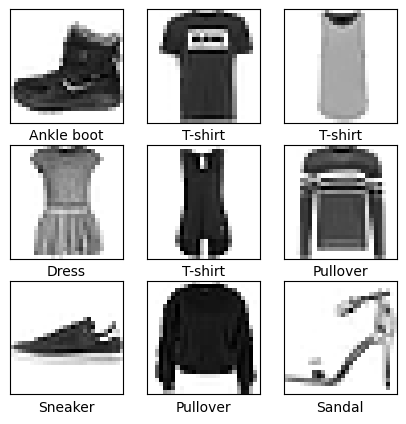

In [ ]:
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Preprocess the data

In [ ]:
# Data sclating
train_images = train_images / 255.0
test_images =  test_images / 255.0


## Build the model

In [ ]:
def classify_builder():
    network = tf.keras.Sequential()

    network.add(layers.Flatten(input_shape=(28, 28)))
    network.add(layers.Dense(128, activation='relu'))
    network.add(tf.keras.layers.Dense(10))

    network.summary()

    return network

In [ ]:
model = classify_builder()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 128)               100480    
                                                                 
 dense_49 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the model

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6953 - accuracy: 0.7762
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4776 - accuracy: 0.8377
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4333 - accuracy: 0.8516
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4075 - accuracy: 0.8591
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3897 - accuracy: 0.8645
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3753 - accuracy: 0.8694
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3633 - accuracy: 0.8733
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3537 - accuracy: 0.8767
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3439 - accuracy: 0.8806
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3

## Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3872 - accuracy: 0.8618 - 601ms/epoch - 2ms/step
Test accuracy: 0.8618000149726868


## Prediction

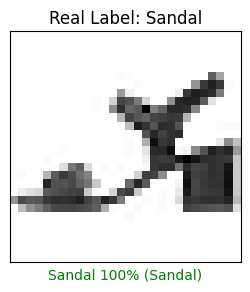

In [ ]:
i = np.random.randint(0, test_images.shape[0])

sample_image = test_images[i].reshape(1, 28, 28)
real_label = test_labels[i]
pred_labels = model.predict(sample_image, verbose=0)

plt.figure(figsize=(3, 3))
plt.imshow(sample_image[0, :, :], cmap='binary')

plt.grid(False)
plt.xticks([])
plt.yticks([])

predicted_label = np.argmax(pred_labels)

color = 'green' if predicted_label == real_label else 'red'


plt.title("Real Label: {}".format(class_names[real_label]))

plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(tf.sigmoid(pred_labels)),
                                class_names[real_label]),
                                color=color)
plt.show()